# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#!pip install citipy
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")

Processing record 1|atuona
Processing record 2|joshimath
Processing record 3|lavrentiya
Processing record 4|busselton
Processing record 5|erenhot
Processing record 6|tasiilaq
Processing record 7|hilo
City not found. skipping.
Processing record 8|butaritari
Processing record 9|ushuaia
Processing record 10|punta arenas
Processing record 11|san patricio
Processing record 12|hobart
Processing record 13|praxedis guerrero
Processing record 14|airai
Processing record 15|gairo
Processing record 16|rikitea
Processing record 17|albany
Processing record 18|paamiut
Processing record 19|port alfred
Processing record 20|kudahuvadhoo
Processing record 21|marawi
Processing record 22|korem
Processing record 23|qaanaaq
Processing record 24|comodoro rivadavia
Processing record 25|cochrane
Processing record 26|hermanus
Processing record 27|itarema
Processing record 28|bredasdorp
Processing record 29|sao miguel do araguaia
Processing record 30|kudat
City not found. skipping.
Processing record 31|xichang
Pr

Processing record 249|takoradi
Processing record 250|ankang
Processing record 251|quatre cocos
Processing record 252|naushki
Processing record 253|batemans bay
Processing record 254|thompson
Processing record 255|zabol
Processing record 256|souillac
Processing record 257|barcelos
Processing record 258|george
Processing record 259|broken hill
Processing record 260|lorengau
Processing record 261|berlevag
Processing record 262|kieta
Processing record 263|banepa
Processing record 264|fenoarivo atsinanana
Processing record 265|nefteyugansk
Processing record 266|kansanshi
Processing record 267|saint paul
Processing record 268|skjervoy
Processing record 269|sorong
Processing record 270|okhotsk
Processing record 271|saint george
Processing record 272|okakarara
Processing record 273|yatou
Processing record 274|yazd
City not found. skipping.
Processing record 275|torbay
Processing record 276|saint-augustin
Processing record 277|lata
Processing record 278|upernavik
Processing record 279|port hedl

Processing record 497|kavieng
Processing record 498|yerbogachen
Processing record 499|severnyy-kospashskiy
Processing record 500|dharmapuri
Processing record 501|osorno
City not found. skipping.
Processing record 502|taltal
Processing record 503|coihaique
City not found. skipping.
Processing record 504|tarauaca
Processing record 505|shenjiamen
Processing record 506|srednekolymsk
Processing record 507|chengde
City not found. skipping.
Processing record 508|seredka
Processing record 509|ngunguru
Processing record 510|ust-barguzin
Processing record 511|nome
Processing record 512|krasnoselkup
Processing record 513|yaan
Processing record 514|viedma
Processing record 515|wajir
Processing record 516|aix-en-provence
Processing record 517|general pico
City not found. skipping.
Processing record 518|opocno
Processing record 519|rohru
Processing record 520|korla
Processing record 521|victor harbor
Processing record 522|zhuhai
Processing record 523|sharjah
Processing record 524|sobolevo
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#Creating city dataframe
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Temperature":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

#Exporting data to csv
city_df.to_csv("../output_data/cities.csv")

#Displaying dataframe
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind Speed
City ID,,,,,,,,,
0,Atuona,43,PF,1651163430,78,-9.8000,-139.0333,78.44,21.63
1,Joshīmath,84,IN,1651163431,69,30.5667,79.5667,60.73,7.27
2,Lavrentiya,99,RU,1651163431,92,65.5833,-171.0000,26.17,9.08
3,Busselton,82,AU,1651163431,77,-33.6500,115.3333,56.89,5.53
4,Erenhot,100,CN,1651163432,21,43.6475,111.9767,52.30,6.89


In [17]:
city_df.count()

City           562
Cloudiness     562
Country        562
Date           562
Humidity       562
Lat            562
Lng            562
Temperature    562
Wind Speed     562
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

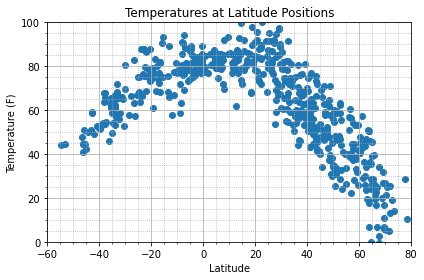

In [21]:
x_values = city_df["Lat"]
y_values = city_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


## Latitude vs. Humidity Plot

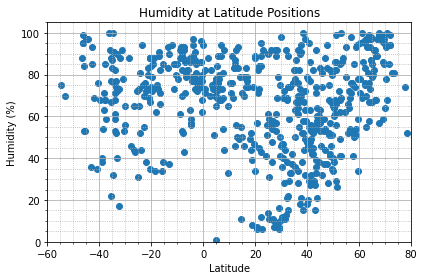

In [24]:
x_values = city_df["Lat"]
y_values = city_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


## Latitude vs. Cloudiness Plot

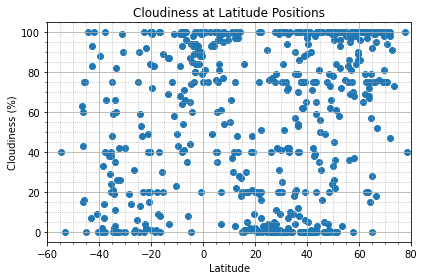

In [27]:
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

## Latitude vs. Wind Speed Plot

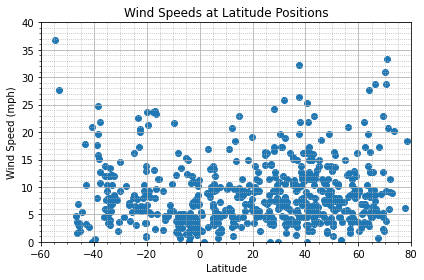

In [30]:
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


## Linear Regression

In [31]:

mask = city_df['Lat'] > 0
northern_hemisphere = city_df[mask]
southern_hemisphere = city_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

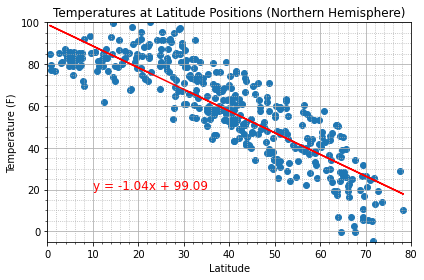

In [41]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

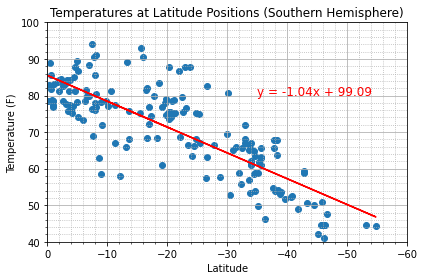

In [44]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


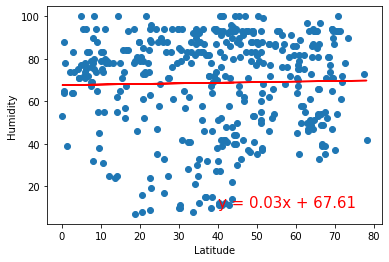

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

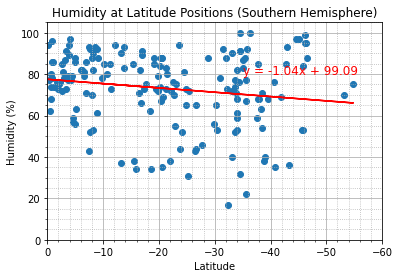

In [45]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

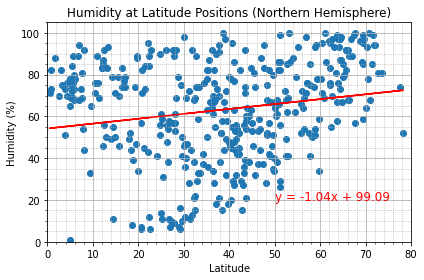

In [46]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

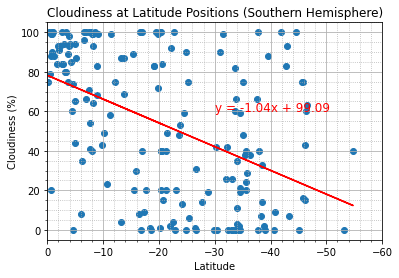

In [48]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

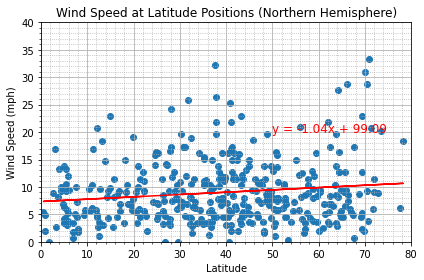

In [49]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

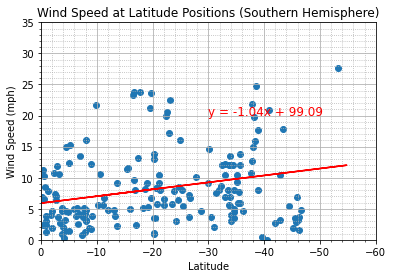

In [50]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept


plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()